In [1]:
import pystan
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 16.1

### 16.1.1

In [2]:
ocode = """data {
}

parameters {
    
}

model {
    
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0b549de6fb9b1cea6f8761c25c0b0d08 NOW.


### 16.1.2

In [3]:
ocode = """data {
    int N;
    int X[N];
}

parameters {
    real<lower=0> lambda;
}

model {
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_34250c604759d685d5891d5907a10de8 NOW.


### 16.1.3

In [4]:
ocode = """data {
    int N;
    int X[N];
}

parameters {
    real<lower=0> lambda;
}

model {
    X ~ poisson(lambda);
    lambda ~ lognormal(2, 1);
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a53ff4b870b79428fbcc3a9e9747054a NOW.


### 16.1.4. 

Already done (import pystan)

### 16.1.5

In [5]:
df = pd.read_csv('data/evaluation_discoveries.csv')
df

,time,discoveries
0,1860,5
1,1861,3
2,1862,0
3,1863,2
4,1864,0
...,...,...
95,1955,1
96,1956,0
97,1957,0
98,1958,2


In [6]:
data = {'N': df.shape[0], 'X':df.discoveries.values}

### 16.1.6

In [7]:
fit = sm.sampling(data=data, iter=1000, chains=4, seed=1)

### 16.1.7

In [8]:
fit

Inference for Stan model: anon_model_a53ff4b870b79428fbcc3a9e9747054a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   3.09  6.2e-3   0.18   2.73   2.97   3.09   3.21   3.44    812    1.0
lp__    39.85    0.02   0.73   37.6   39.7  40.13  40.31  40.36   1114    1.0

Samples were drawn using NUTS at Tue Dec 22 17:53:25 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

### 16.1.8

`n_eff` is in range 700-900

### 16.1.9

In [9]:
np.quantile(fit.extract()['lambda'], [.1, .9])

array([2.86676595, 3.31281738])

### 16.1.10

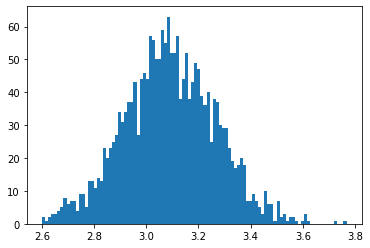

In [10]:
plt.hist(fit.extract()['lambda'], bins=100);

### 16.1.11

<AxesSubplot:>

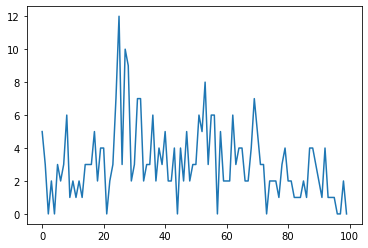

In [11]:
df.discoveries.plot()

<AxesSubplot:>

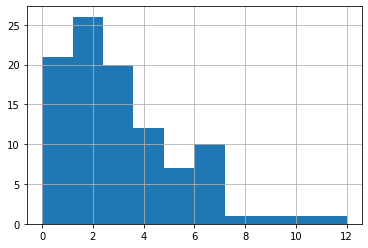

In [12]:
df.discoveries.hist()

In [13]:
df.discoveries.mean(), df.discoveries.var()

(3.1, 5.08080808080808)

### 6.1.12

In [14]:
ocode = """data {
    int N;
    int X[N];
}

parameters {
    real<lower=0> lambda;
}

model {
    X ~ poisson(lambda);
    lambda ~ lognormal(2, 1);
}

generated quantities {
    int<lower = 0> X_gen[N];
    for (i in 1:N) {
        X_gen[i] = poisson_rng(lambda);
    }
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0bdbf91072ecb42e656d5e9e8cb8f447 NOW.


In [15]:
fit = sm.sampling(data=data, iter=1000, chains=4, seed=1)

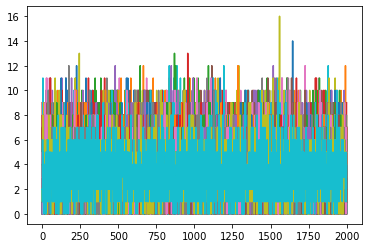

In [16]:
plt.plot(fit.extract()['X_gen']);

In [17]:
posterior_checks = fit.extract()['X_gen']

In [18]:
(posterior_checks >= df.discoveries.max()).any(axis=1).mean()*100

1.15

### 16.1.13

In [19]:
ocode = """data {
    int N;
    int X[N];
}

parameters {
    real<lower=0> mi;
    real<lower=0> kappa;
}

model {
    X ~ neg_binomial_2(mi, kappa);
    mi ~ lognormal(2, 1);
    kappa ~ lognormal(2, 1);
}

generated quantities {
    int<lower = 0> X_gen[N];
    for (i in 1:N) {
        X_gen[i] = neg_binomial_2_rng(mi, kappa);
    }
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b6af453f5a74534ae8e908b624ef2891 NOW.


In [20]:
fit = sm.sampling(data=data, iter=1000, chains=4, seed=1)

In [21]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_b6af453f5a74534ae8e908b624ef2891.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mi          3.12  6.0e-3   0.22   2.72   2.96   3.11   3.27   3.58   1348    1.0
kappa       6.95    0.13   3.74   3.03   4.71   6.07   8.05  16.88    787   1.01
X_gen[1]    3.18    0.05   2.18    0.0    2.0    3.0    4.0    8.0   1891    1.0
X_gen[2]     3.1    0.05   2.18    0.0    2.0    3.0    4.0    8.0   1900    1.0
X_gen[3]     3.1    0.05    2.2    0.0    2.0    3.0    4.0    8.0   2016    1.0
X_gen[4]    3.15    0.05   2.24    0.0    2.0    3.0    4.0    8.0   1977    1.0
X_gen[5]     3.1    0.05    2.2    0.0    1.0    3.0    4.0    8.0   1884    1.0
X_gen[6]    3.14    0.05   2.16    0.0    1.0    3.0    4.0    8.0   2067    1.0
X_gen[7]    3.08    0.05   2.15    0.0    2.

### 16.1.14

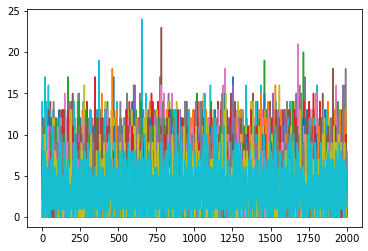

In [22]:
plt.plot(fit.extract()['X_gen']);

In [23]:
posterior_checks = fit.extract()['X_gen']

In [24]:
(posterior_checks >= df.discoveries.max()).any(axis=1).mean()*100

24.45

### 16.1.15

In [25]:
np.quantile(fit.extract()['mi'], [.1, .9])

array([2.83885761, 3.40567936])

### 16.1.16

In [26]:
residuals = df.discoveries - posterior_checks[0,:].shape

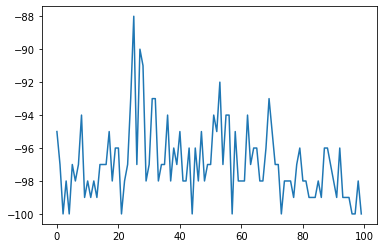

In [27]:
plt.plot(residuals)